# PyTorch Workflow

Let's explore an example PyTorch end to end workflow

Resources:
* Ground Truth notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb


In [52]:
what_weare_covering = { 1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting the model to the data (training)",
                        4: "making predictions and evaluating a model (inference)",
                        5: "saving and loading a model",
                        6: "putting it all together"}

what_weare_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [53]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.3.1'

# 1. Data Preparing and Loading

Data can be almost anything... in machine learning.

* Excel spreadsheet
* images
* videos
* audio
* DNA
* text

Machine learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula

We'll use a linear regression formula to make a straight line with *known* **parameters**. 


In [54]:
# Create *known* parameters
weight = 0.7
bias = 0.3 

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)

y = weight * X + bias

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X , y = X.to(device), y.to(device)

X[ : 10], y[ : 10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]], device='cuda:0'),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]], device='cuda:0'),
 50,
 50)

In [55]:
X.device, y.device

(device(type='cuda', index=0), device(type='cuda', index=0))

### Splitting data into training and test sets (One of the most important concepts in machine learning in general)

Let's create a training and testing set with our data

In [56]:
# Create a train/test split

train_split = int(0.8 * len(X))
#train_split

X_train , Y_train = X[ : train_split], y[ : train_split]
X_test, Y_test = X[train_split : ], y [train_split : ]

X_train, Y_train

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize"

In [57]:
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):

  """
  Plots training data, test data and compare predictions
  """
  if train_data.is_cuda:
        train_data = train_data.cpu()
  if train_labels.is_cuda:
      train_labels = train_labels.cpu()
  if test_data.is_cuda:
      test_data = test_data.cpu()
  if test_labels.is_cuda:
      test_labels = test_labels.cpu()
  if predictions is not None and predictions.is_cuda:
      predictions = predictions.cpu()
      
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c= "b", s = 4, label = "Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c= "g", s = 4, label = "Testing data")

  # Are there predictions?
  if predictions is not None:

    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")


  #Show the legend
  plt.legend(prop = {"size" : 14})

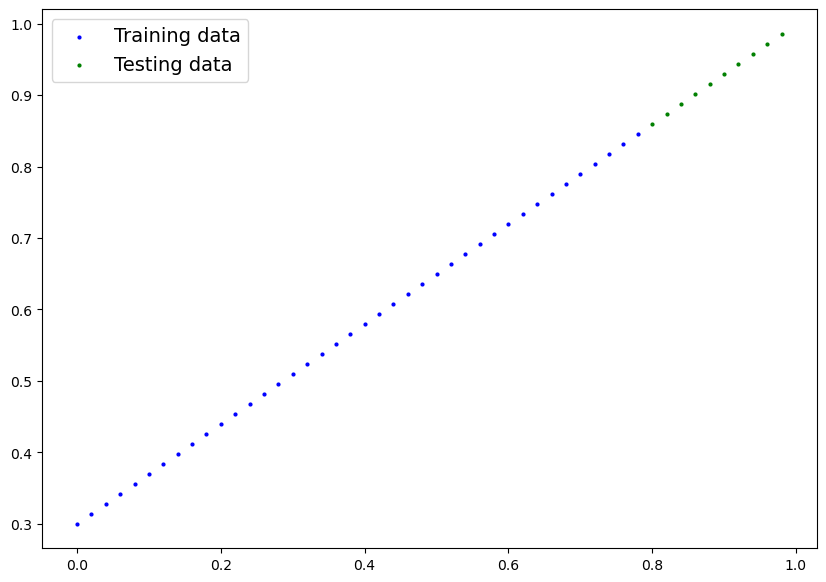

In [58]:
plot_predictions()

# 2. Build Model

Our first PyTorch Model

This is very exciting... let's do it


What our model does:
* Start with random values(weight and bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values. (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Back propogation

In [59]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad= True,
                                                dtype= torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                                requires_grad= True,
                                                dtype= torch.float))

        # Forward method to define the computation in the model
    def forward(self, x : torch.Tensor) -> torch.Tensor:   # <- x is the input data
        return self.weights * x + self.bias
        


result = LinearRegressionModel()
result.to(device)
print(result.weights)
print(result.forward(X_test))



Parameter containing:
tensor([-1.1229], device='cuda:0', requires_grad=True)
tensor([[-1.0846],
        [-1.1071],
        [-1.1295],
        [-1.1520],
        [-1.1744],
        [-1.1969],
        [-1.2194],
        [-1.2418],
        [-1.2643],
        [-1.2867]], device='cuda:0', grad_fn=<AddBackward0>)


### Pytorch model building essentials
* torch.nn - contains all of the buildings blocks for computational graphs (another word for neural networks)
* torch.nn.parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model, now let's see what's inside it

In [60]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is the subclass of nn.Module)
model_0 = LinearRegressionModel()
model_0.to(device)

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

In [61]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

### Making predictions using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'x_test'.

When we pass data through our model, it's going to run it through the forward() method


In [62]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], device='cuda:0', grad_fn=<AddBackward0>)

In [63]:
# Make predictions with model
with torch.inference_mode():   # inference mode doesn't keeps track of gradients and helps your code run faster
    y_preds = model_0(X_test)


# You can also do the same thing with torch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad():
#    y_preds = model_0(X_test)


y_preds, Y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]], device='cuda:0'),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]], device='cuda:0'))

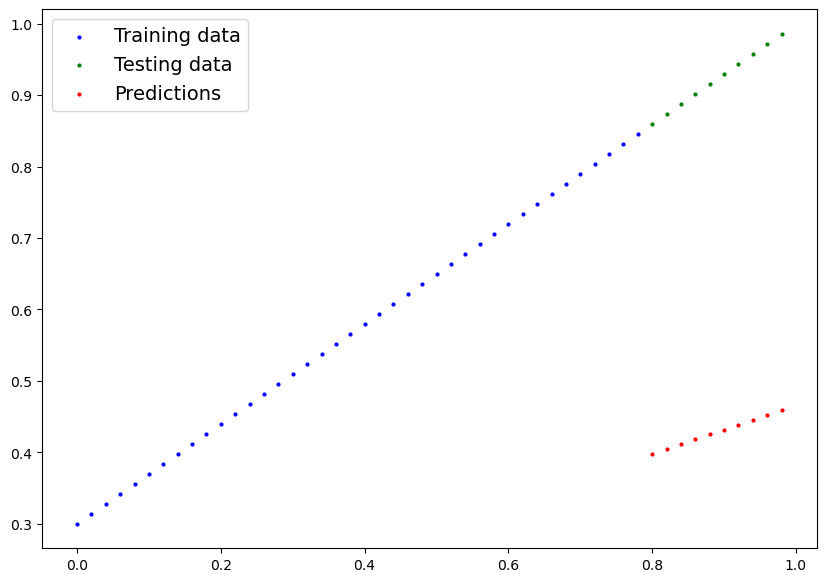

In [64]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea for training is for a model to move from some *unknow* parameters (these may be random) to some *known parameters*

Or in other words from a poor representation of the data to a better representation of the data. 

One way to measure how poor or how wrong your models predictions are is to use a loss function. https://pytorch.org/docs/stable/nn.html#loss-functions

* Note: Loss function may also be called cost function or crieterion in different areas. For our care, we are going to refer to it as a loss function

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g: weight and bias in our case) to improve the loss function https://pytorch.org/docs/stable/optim.html


**For our problem, since we're predicting a number, let's use MAE (which is under torch.nn.L1Loss()) in PyTorch as our loss function.**

* Mean absolute error (MAE, in PyTorch: torch.nn.L1Loss) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

**And we'll use SGD, torch.optim.SGD(params, lr) where:**

* *params* is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
* *lr* is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [65]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

In [66]:
# Check outs our model parameters ( a parameter is a value that a model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [67]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer (stochastic gradient descent )
optimizer = torch.optim.SGD(params= model_0.parameters(), # We want to optimize the parameters present in our model
                            lr = 0.01) # lr = learning rate = possibly the most important  hyperparameter you can set


In [68]:
loss_fn

L1Loss()

### Building a training loop and a testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's 'forward()' functions) - also called forward propogation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [69]:
torch.manual_seed(42)


model_0.to(device)

# An epoch is one loop through the data
epochs = 200

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
    # set the model to the training mode
    
    model_0.train() # train mode in Pytorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, Y_train)
    

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropogation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)      
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above step 3 for the next iteration of the loop 

    ### Testing
    model_0.eval() # turns off gradient tracking / turns off different settings in the model not needed for evaluation / testing (dropout / batch norm layers)

    with torch.inference_mode():

      #1. do forward pass
      test_pred = model_0(X_test)

      #2. Calculate the loss
      test_loss = loss_fn(test_pred, Y_test)

    # Print out what's happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    
      print(model_0.state_dict(), "\n")
    
      print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288135051727295 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406], device='cuda:0'), 'bias': tensor([0.1388], device='cuda:0')}) 

OrderedDict({'weights': tensor([0.3406], device='cuda:0'), 'bias': tensor([0.1388], device='cuda:0')})
Epoch: 10 | Loss: 0.1976713389158249 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796], device='cuda:0'), 'bias': tensor([0.2388], device='cuda:0')}) 

OrderedDict({'weights': tensor([0.3796], device='cuda:0'), 'bias': tensor([0.2388], device='cuda:0')})
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729658544063568
OrderedDict({'weights': tensor([0.4184], device='cuda:0'), 'bias': tensor([0.3333], device='cuda:0')}) 

OrderedDict({'weights': tensor([0.4184], device='cuda:0'), 'bias': tensor([0.3333], device='cuda:0')})
Epoch: 30 | Loss: 0.0531485341489315 | Test loss: 0.14464019238948822
OrderedDict({'weights': tensor([0.4512], device='cuda:0'), 'bias': tensor([0.3768], device='cuda

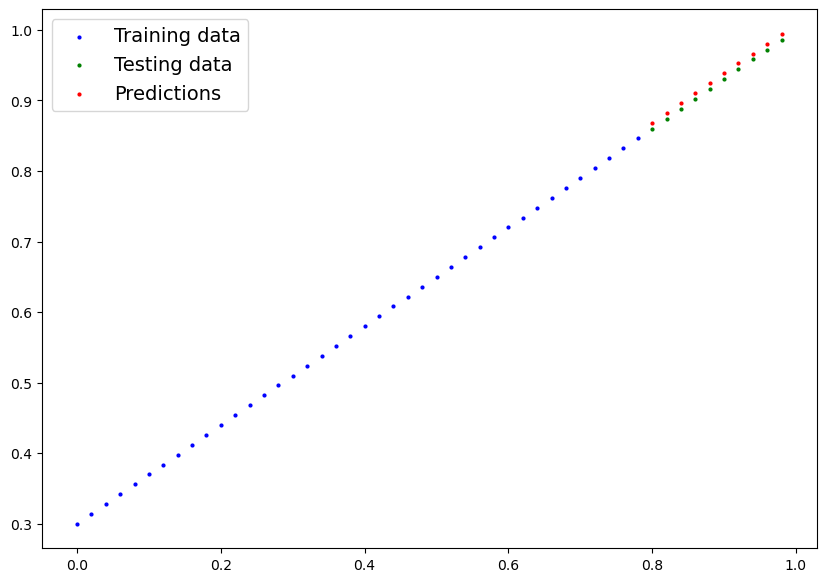

In [70]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [71]:
weight, bias

(0.7, 0.3)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

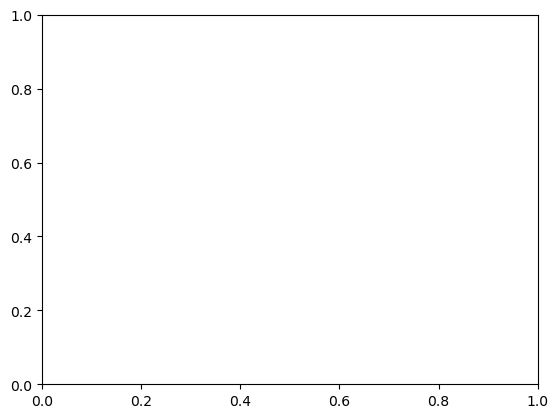

In [72]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("training and testing loss curves")
plt.x_label("Epochs")
plt.ylabel("Loss")
plt.legend();

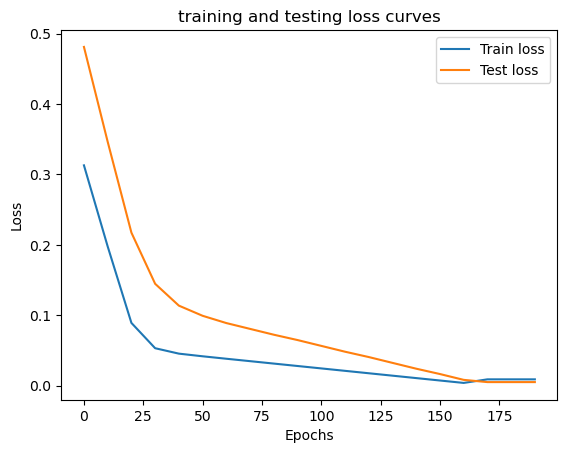

In [73]:
import numpy as np
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).cpu().numpy()), label = "Train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).cpu(), label = "Test loss")
plt.title("training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

### Saving a model in Pytorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. 'torch.save()' - allows you to save a PyTorch object in Python's pickle format
2. 'torch.load()' - allows you load a saved PyTorch object 
3. 'torch.nn.Module.load_state_dict()' - this allows you to load a model's saved state dictionary
https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [74]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990], device='cuda:0')),
             ('bias', tensor([0.3093], device='cuda:0'))])

In [75]:
# Saving our PyTorch model
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f= MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


### Loading a pytorch model

Since we saved our model's 'state_dict()' rather than the entire model, we'll create a new instance of our model class and load the saved 'state_dict()' into that

In [76]:
# To load a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [78]:
### Make some predictions with our loaded model
loaded_model_0.to(device)
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], device='cuda:0')

In [80]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], device='cuda:0')

In [81]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

### Putting it all together
Let's go back through the steps above and see it all in once

In [3]:
# import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1'

Create device agnostic code

In [4]:
device = 'cuda' if torch.cuda.is_available else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 1. Data

In [5]:
# Create some data using the linear regression formula using y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range value
start = 0
end = 1
step = 0.02

# Create x and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[ : 10], y[ : 10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
# Split data
train_split = int(0.8 * len(X))

X_train, Y_train, X_test, Y_test = X[:train_split], y[:train_split], X[train_split : ], y[train_split : ]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

### 2. Building a model

In [7]:

class LinearRegressionModelV2(nn.Module):

    def __init__(self) :
        super().__init__()

        # Use nn.Linear() for creating model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features= 1, out_features= 1)


    def forward(self, x : torch.tensor) -> torch.tensor :
        return self.linear_layer(x)
    
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [8]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 3. Training our model

In [9]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(),lr = 0.01)

# Training loop
torch.manual_seed(42)

epochs= 200

# Put data on target device
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)


for epoch in range(epochs):
    model_1.train()

    #1. Forward pass
    y_pred = model_1(X_train)


    #2. Calculate the loss
    loss = loss_fn(y_pred, Y_train)

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Perform backpropagation
    loss.backward()

    #5. Optimizer step
    optimizer.step()


    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, Y_test)

    
    #print out what's happening
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [10]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 4. Making and evaluating predictions

In [18]:
# Turn model into evaluation mode
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds, Y_test

(tensor([[0.8600],
         [0.8739],
         [0.8878],
         [0.9018],
         [0.9157],
         [0.9296],
         [0.9436],
         [0.9575],
         [0.9714],
         [0.9854]], device='cuda:0'),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]], device='cuda:0'))

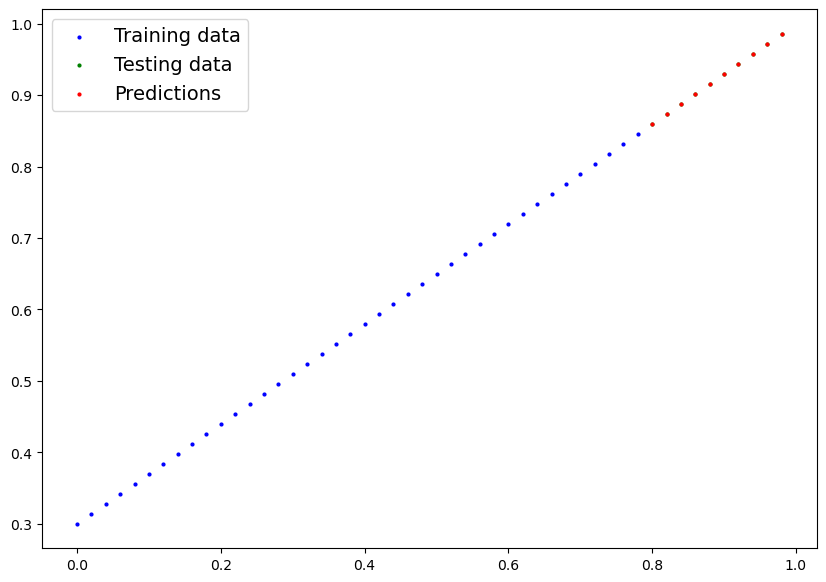

In [12]:


def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):

  """
  Plots training data, test data and compare predictions
  """
  if train_data.is_cuda:
        train_data = train_data.cpu()
  if train_labels.is_cuda:
      train_labels = train_labels.cpu()
  if test_data.is_cuda:
      test_data = test_data.cpu()
  if test_labels.is_cuda:
      test_labels = test_labels.cpu()
  if predictions is not None and predictions.is_cuda:
      predictions = predictions.cpu()
      
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c= "b", s = 4, label = "Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c= "g", s = 4, label = "Testing data")

  # Are there predictions?
  if predictions is not None:

    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")


  #Show the legend
  plt.legend(prop = {"size" : 14})


# Checkout model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 5. Saving a trained model

In [13]:

from pathlib import Path

MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents= True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj = model_1.state_dict(),f = MODEL_SAVE_PATH)

Saving model to: model/01_pytorch_workflow_model_1.pth


### Loading a trained model

In [15]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#loaded_model_1.state_dict()

# Making predictions with loaded model
loaded_model_1.to(device)

loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

loaded_model_1_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [19]:
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

### Complete code in one step self written

In [43]:
# Libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

#print(device)


# Preparing data for Linear Regression
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)

# Linear Regression equation y = mx + c
y = weight * X + bias

# Preparing data for training and testing
train_split = int(0.8 * len(X))

X_train = X[ : train_split].to(device)
Y_train = y[ : train_split].to(device)
X_test = X[train_split : ].to(device)
Y_test = y[train_split : ].to(device)


# Building a model

class LinearRegressionModelV3(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.linear_layer = nn.Linear(in_features=1, out_features=1)


    def forward(self, x : torch.tensor) -> torch.tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)    
# Creating a model
model_2 = LinearRegressionModelV3()

model_2.to(device)
#next(model_2.parameters()).device
#model_2, model_2.state_dict()

# Loss function
loss_fn = nn.L1Loss()

# Optimizer
Optimizer = torch.optim.SGD(params= model_2.parameters(), 
                            lr= 0.001)

# Writing training code
epochs = 2000

for epoch in range(epochs):
    model_2.train()

    #1. Forward pass
    y_preds = model_2(X_train)

    #2. Calculate Loss
    training_loss = loss_fn(y_preds, Y_train)

    #3. Optimizer zero grad
    Optimizer.zero_grad()

    #4. Backpropagation
    training_loss.backward()

    #5. Optimizer step
    Optimizer.step()

    # Writing testing code
    model_2.eval()

    with torch.inference_mode():
        model_2_preds = model_2(X_test)
        test_loss = loss_fn(model_2_preds, Y_test)

    
    if epoch%10 == 0:
        print(f"Epochs : {epoch} | Training Loss : {training_loss} | Test_Loss : {test_loss}")


print("----------------------------------------------------------\n\n")
result = model_2.state_dict()
print(f"Weight : {weight}  |  Predicted Weight {result["linear_layer.weight"]}")
print(f"Bias : {bias}  |  Predicted Bias {result["linear_layer.bias"]}")


# Saving our model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "LinearRegressionModelV3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_2.state_dict(),
           f = MODEL_SAVE_PATH)
print(f"Model saved at {MODEL_SAVE_PATH}")






Epochs : 0 | Training Loss : 0.5551779866218567 | Test_Loss : 0.5861001014709473
Epochs : 10 | Training Loss : 0.5436570644378662 | Test_Loss : 0.5726293921470642
Epochs : 20 | Training Loss : 0.5321362614631653 | Test_Loss : 0.5591585040092468
Epochs : 30 | Training Loss : 0.5206153988838196 | Test_Loss : 0.5456876754760742
Epochs : 40 | Training Loss : 0.5090945363044739 | Test_Loss : 0.5322169661521912
Epochs : 50 | Training Loss : 0.49757376313209534 | Test_Loss : 0.5187460780143738
Epochs : 60 | Training Loss : 0.48605284094810486 | Test_Loss : 0.5052752494812012
Epochs : 70 | Training Loss : 0.47453203797340393 | Test_Loss : 0.49180442094802856
Epochs : 80 | Training Loss : 0.4630111753940582 | Test_Loss : 0.4783336818218231
Epochs : 90 | Training Loss : 0.4514903724193573 | Test_Loss : 0.4648628234863281
Epochs : 100 | Training Loss : 0.4399694502353668 | Test_Loss : 0.4513919949531555
Epochs : 110 | Training Loss : 0.4284486472606659 | Test_Loss : 0.4379211962223053
Epochs : 12

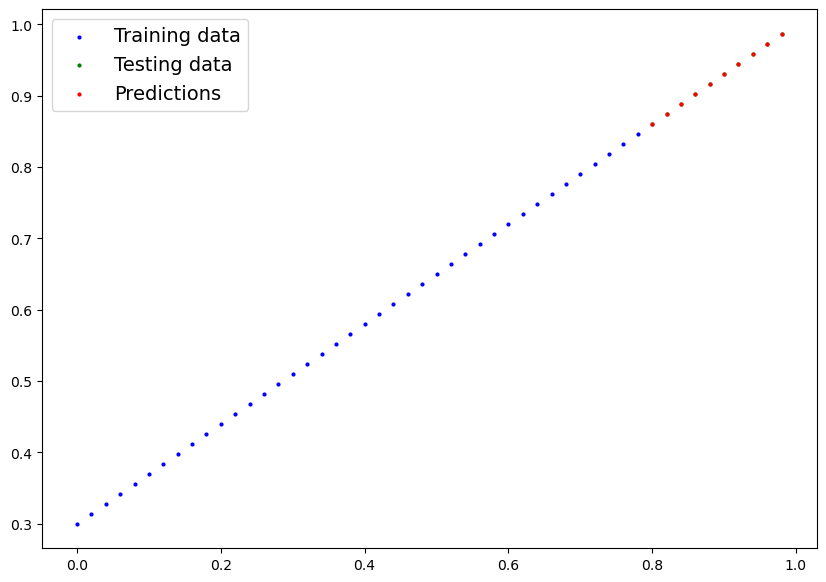

In [44]:
# Plotting our model
plot_predictions(predictions=model_2_preds.cpu())

In [45]:
# Loading our model
model_4 = LinearRegressionModelV3()
model_4.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
model_4.state_dict()

torch.manual_seed(42)
model_4.to(device)
model_4.eval()
with torch.inference_mode():
    model_4_preds = model_4(X_test)


model_2_preds == model_4_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [17]:
weight = 4
bias = 0.5

start = 0
end = 100
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y [:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.5000],
         [0.5400],
         [0.5800],
         [0.6200],
         [0.6600],
         [0.7000],
         [0.7400],
         [0.7800],
         [0.8200],
         [0.8600]]))

In [27]:
train_split = int(0.8 * len(X))
X_train , Y_train = X[:train_split].to(device), y[:train_split].to(device)
X_test , Y_test = X[train_split:].to(device), y[train_split:].to(device)

len(X_test), X_train.device

(2000, device(type='cuda', index=0))

In [19]:
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):

  """
  Plots training data, test data and compare predictions
  """
  if train_data.is_cuda:
        train_data = train_data.cpu()
  if train_labels.is_cuda:
      train_labels = train_labels.cpu()
  if test_data.is_cuda:
      test_data = test_data.cpu()
  if test_labels.is_cuda:
      test_labels = test_labels.cpu()
  if predictions is not None and predictions.is_cuda:
      predictions = predictions.cpu()
      
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c= "b", s = 4, label = "Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c= "g", s = 4, label = "Testing data")

  # Are there predictions?
  if predictions is not None:

    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")


  #Show the legend
  plt.legend(prop = {"size" : 14})

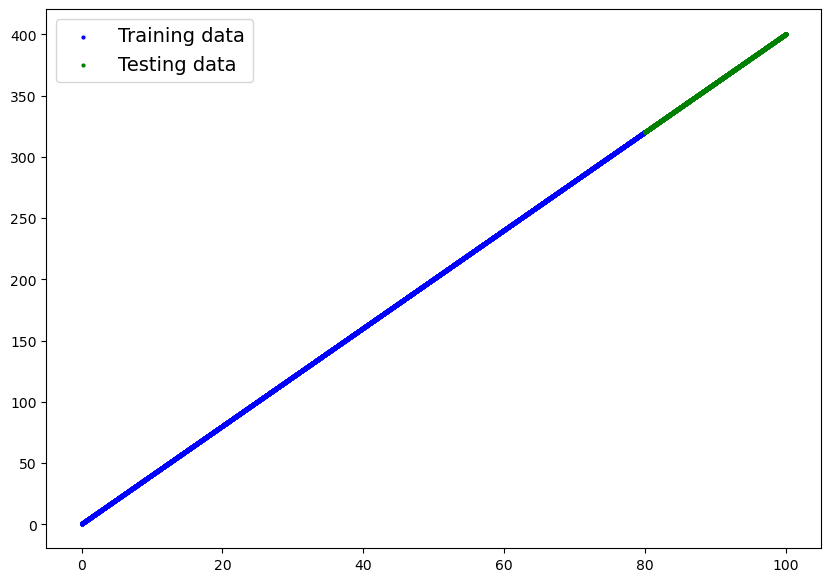

In [20]:
plot_predictions()

In [21]:
class Linear_Regression_Model(nn.Module):
    def __init__(self) :
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    

torch.manual_seed(42)
model_6 = Linear_Regression_Model()
model_6, model_6.state_dict()
model_6.to(device)
next(model_6.parameters()).device

device(type='cuda', index=0)

In [33]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_6.parameters(), lr = 0.0001)

In [64]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    model_6.train()

    y_pred = model_6(X_train)

    loss = loss_fn(y_pred, Y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    #Testing
    model_6.eval()

    with torch.inference_mode():
        test_pred = model_6(X_test)

        test_loss = loss_fn(test_pred, Y_test)


    if epoch%10 == 0:
        print(f"Epoch : {epoch} | Loss: {loss} | Training loss: {test_loss}")


Epoch : 0 | Loss: 0.0014457113575190306 | Training loss: 0.3583722710609436
Epoch : 10 | Loss: 0.001441938104107976 | Training loss: 0.3583761155605316
Epoch : 20 | Loss: 0.0014380955835804343 | Training loss: 0.3583800196647644
Epoch : 30 | Loss: 0.0014339734334498644 | Training loss: 0.3583838939666748
Epoch : 40 | Loss: 0.001429880503565073 | Training loss: 0.3583877682685852
Epoch : 50 | Loss: 0.0014263999182730913 | Training loss: 0.3583913743495941
Epoch : 60 | Loss: 0.0014228769578039646 | Training loss: 0.35839492082595825
Epoch : 70 | Loss: 0.0014193778624758124 | Training loss: 0.3583984971046448
Epoch : 80 | Loss: 0.0014158951817080379 | Training loss: 0.3584020435810089
Epoch : 90 | Loss: 0.0014124102890491486 | Training loss: 0.3584056496620178
Epoch : 100 | Loss: 0.0014089196920394897 | Training loss: 0.35840925574302673
Epoch : 110 | Loss: 0.0014051650650799274 | Training loss: 0.35841280221939087
Epoch : 120 | Loss: 0.0014013658510521054 | Training loss: 0.3584164083003

In [65]:
model_6.state_dict()

OrderedDict([('linear_layer.weight', tensor([[4.0000]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5009], device='cuda:0'))])

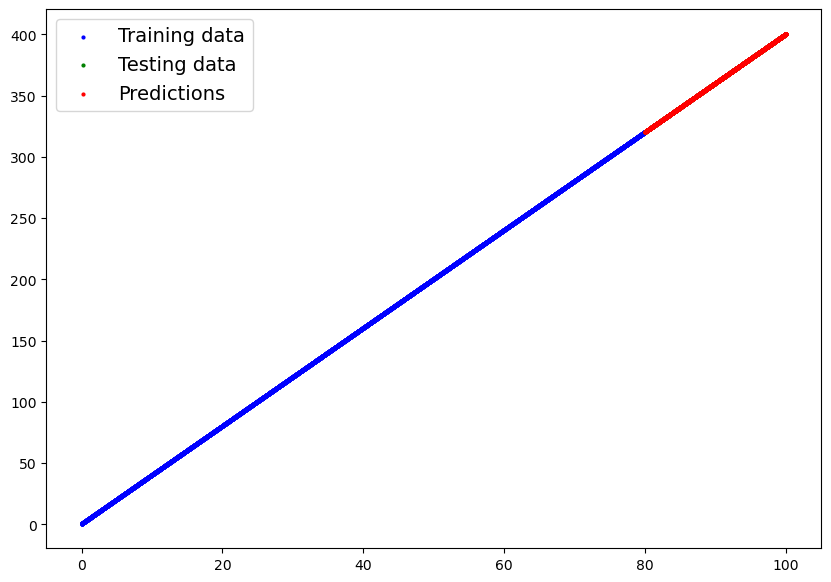

In [66]:
plot_predictions(predictions=test_pred)

In [67]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "Pytorch_model_6.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print("saving_model")
torch.save(obj= model_6.state_dict(), f=MODEL_SAVE_PATH)

saving_model
